In [1]:
import numpy as np
from tensorflow.keras.datasets import mnist
from skimage import metrics
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
print(x_train.shape, x_test.shape)

(60000, 28, 28) (10000, 28, 28)


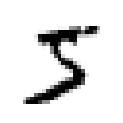

In [4]:
plt.figure(figsize=(2,2))
plt.axis("off")
plt.imshow(x_train[0], cmap='Greys')

In [5]:
# creating a list of averaged out images of digits
digit=0
avg_list=[]
for digit in range(9):
    
    train_filter = np.where((y_train == digit))
    x_filter, y_filter = x_train[train_filter], y_train[train_filter]
    
    N = len(x_filter)
    avg_img = np.zeros((28,28),np.float)

    for i in range(N):
        avg_img = avg_img + x_filter[i]/N
        
    avg_list.append(avg_img)

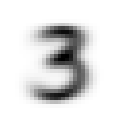

In [6]:
plt.figure(figsize=(2,2))
plt.axis("off")
plt.imshow(avg_list[3], cmap='Greys')

In [9]:
size_test = x_test.shape[0]
ssim_score=[0,0,0,0,0,0,0,0,0,0]
accuracy=0

for i in range(size_test):  
    for j in range(9):
        ssim_score[j] = metrics.structural_similarity(avg_list[j], x_test[i].astype(float))
        
    pred_digit = np.argmax(ssim_score)
    if(pred_digit == y_test[i]):
        accuracy = accuracy+1

In [10]:
percent = (accuracy/10000)*100
print(percent)

72.67
